# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


In [ ]:
df.isnull().sum() / len(df) * 100

,0
Valor_Aluguel,0.0
Valor_Condominio,0.0
Metragem,0.0
N_Quartos,0.0
N_banheiros,0.0
N_Suites,0.0
N_Vagas,0.0


Não há dados faltantes na nossa base de dados. Portanto, não foi necessário fazer substituição ou remoção dos dados.

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [ ]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


Parece que todas as variáveis têm outliers. Os valores das médias são maiores que a mediana, então decidi analisar graficamente!

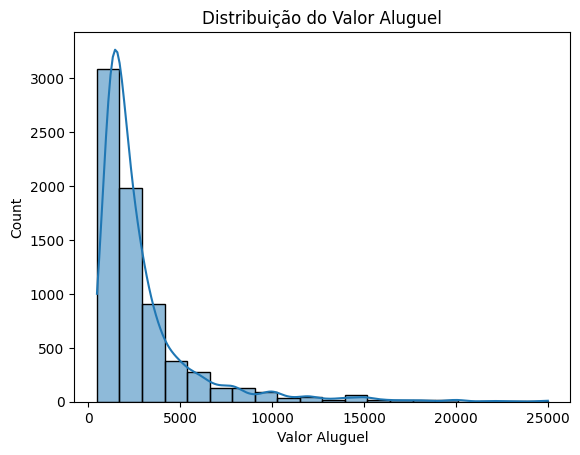

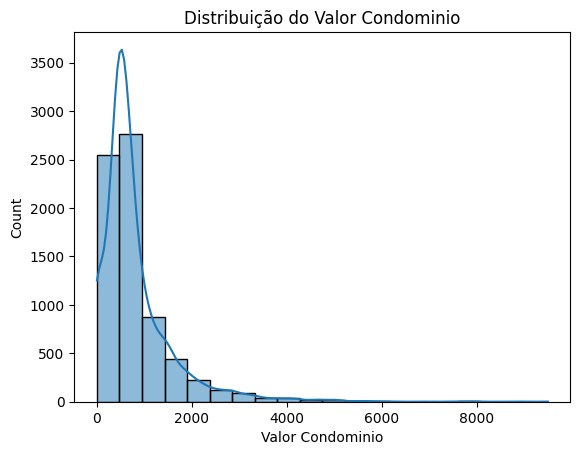

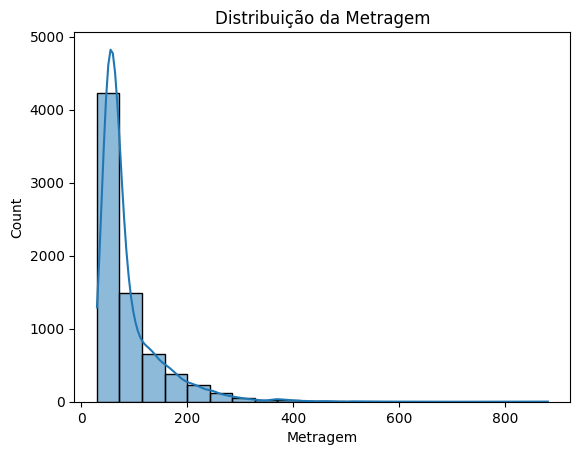

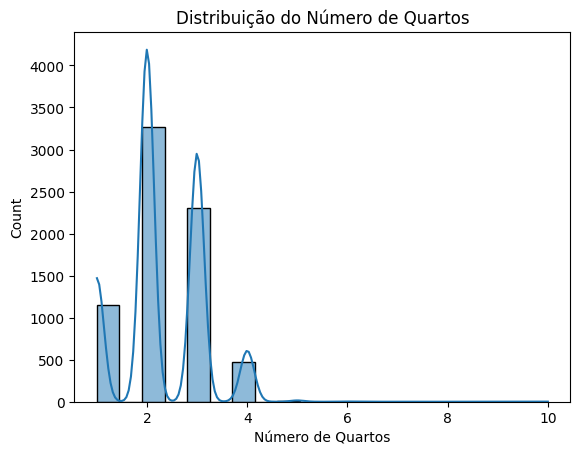

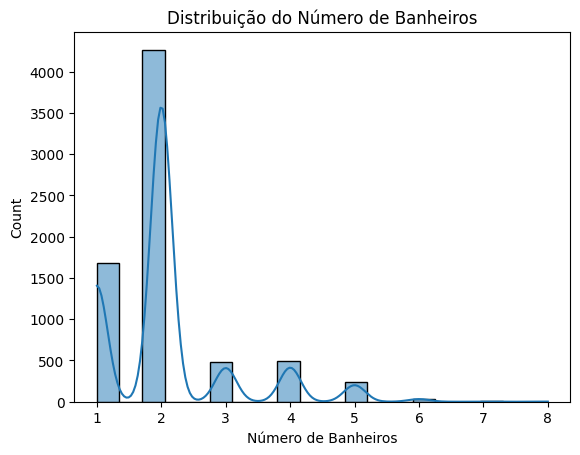

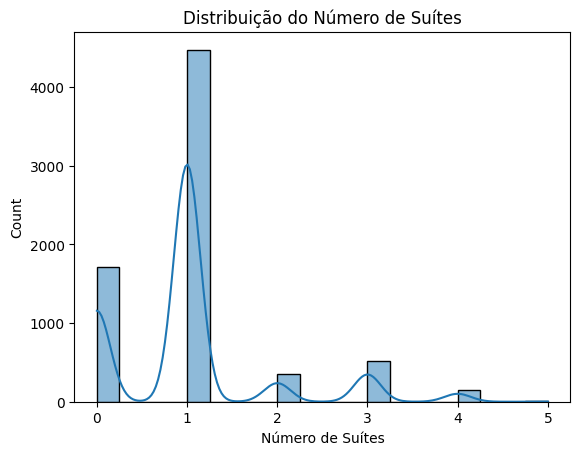

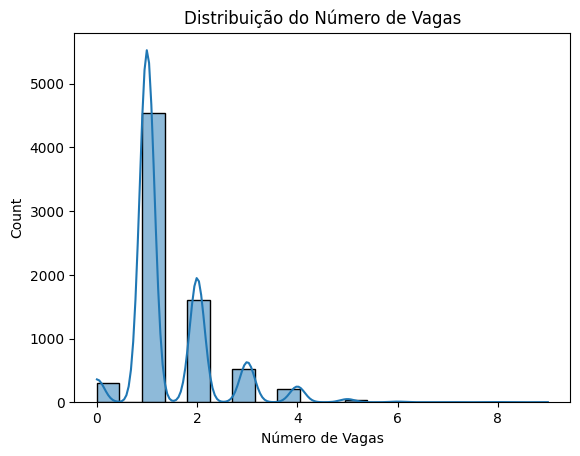

In [ ]:
# B - Distribuição do Valor_Aluguel
sns.histplot(df['Valor_Aluguel'], bins=20, kde=True)
plt.title('Distribuição do Valor Aluguel')
plt.xlabel('Valor Aluguel')
plt.show()

# Distribuição do Valor_Condominio
sns.histplot(df['Valor_Condominio'], bins=20, kde=True)
plt.title('Distribuição do Valor Condominio')
plt.xlabel('Valor Condominio')
plt.show()

# Distribuição da Metragem
sns.histplot(df['Metragem'], bins=20, kde=True)
plt.title('Distribuição da Metragem')
plt.xlabel('Metragem')
plt.show()

# Distribuição do N_Quartos
sns.histplot(df['N_Quartos'], bins=20, kde=True)
plt.title('Distribuição do Número de Quartos')
plt.xlabel('Número de Quartos')
plt.show()

# Distribuição de N_banheiros
sns.histplot(df['N_banheiros'], bins=20, kde=True)
plt.title('Distribuição do Número de Banheiros')
plt.xlabel('Número de Banheiros')
plt.show()

# Distribuição de N_Suites
sns.histplot(df['N_Suites'], bins=20, kde=True)
plt.title('Distribuição do Número de Suítes')
plt.xlabel('Número de Suítes')
plt.show()

# Distribuição de N_vagas
sns.histplot(df['N_Vagas'], bins=20, kde=True)
plt.title('Distribuição do Número de Vagas')
plt.xlabel('Número de Vagas')
plt.show()

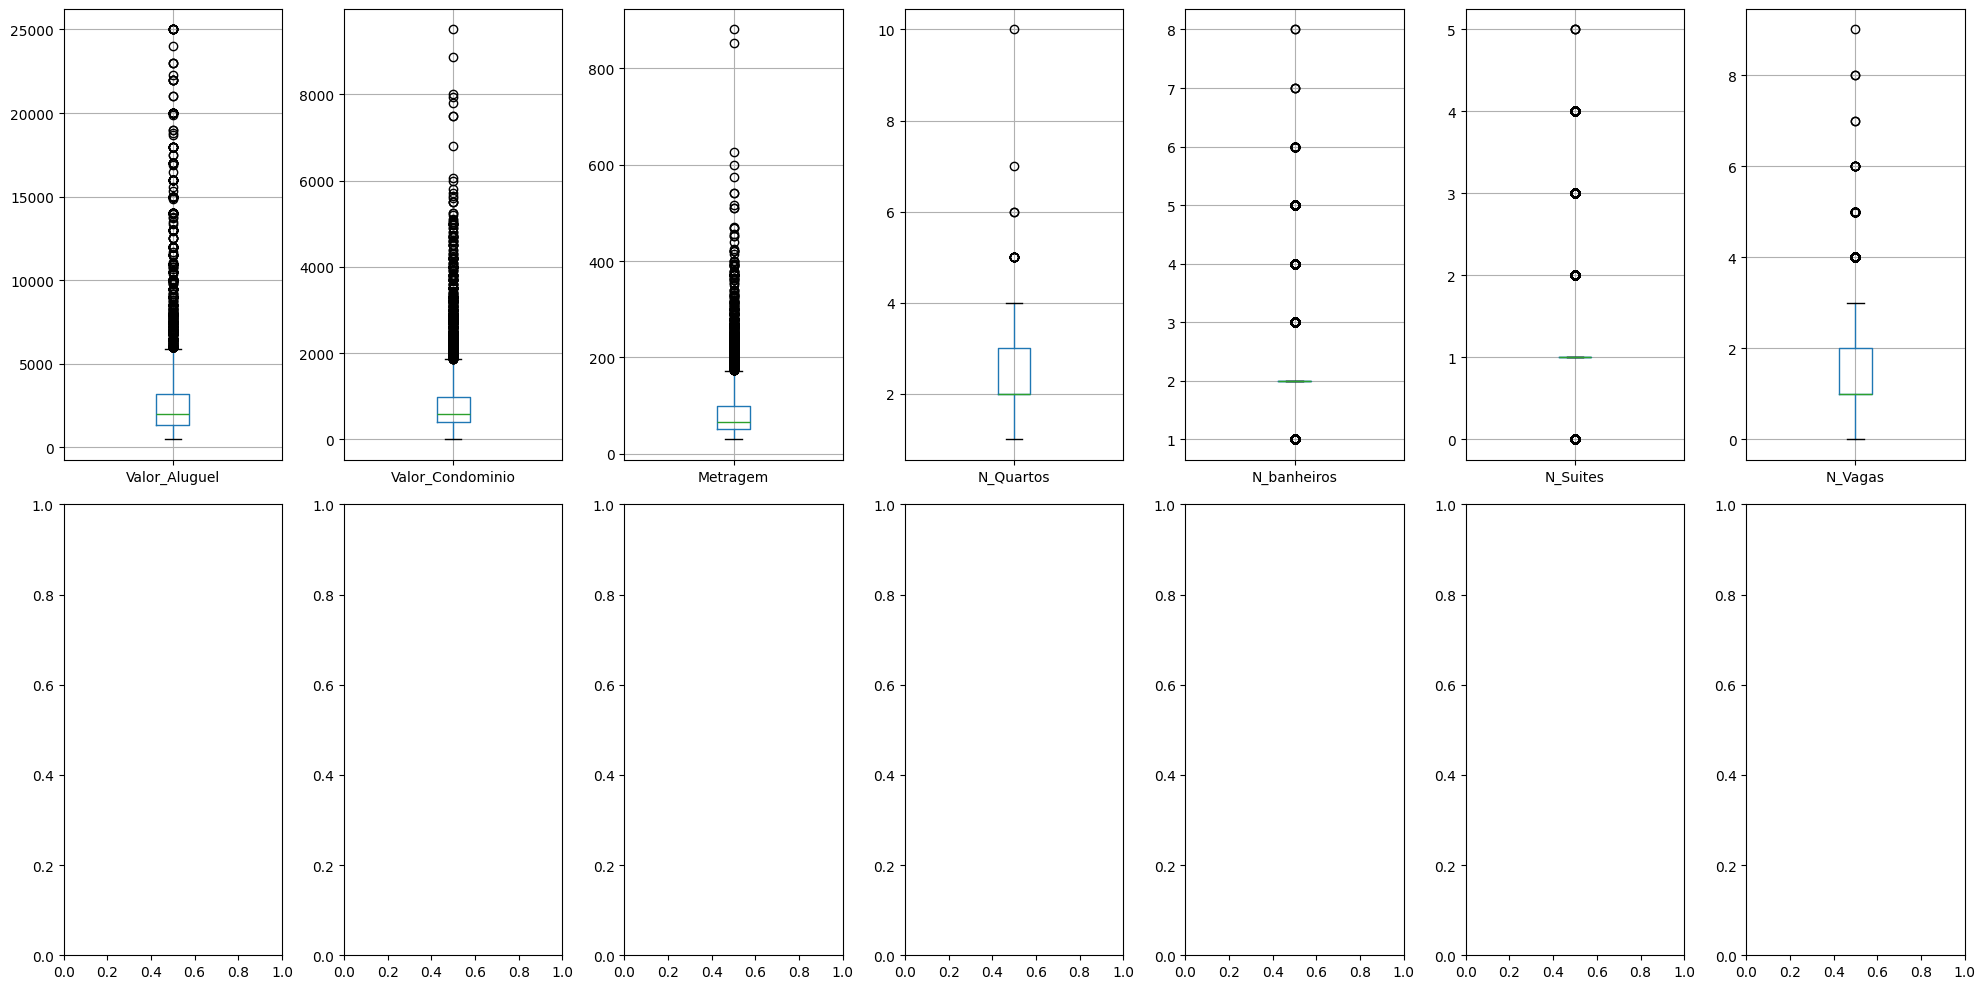

In [ ]:
fig, axes = plt.subplots(2, 7, figsize=(20, 10))
df.boxplot(column='Valor_Aluguel', ax=axes[0, 0])
df.boxplot(column='Valor_Condominio', ax=axes[0, 1])
df.boxplot(column='Metragem', ax=axes[0, 2])
df.boxplot(column='N_Quartos', ax=axes[0, 3])
df.boxplot(column='N_banheiros', ax=axes[0, 4])
df.boxplot(column='N_Suites', ax=axes[0, 5])
df.boxplot(column='N_Vagas', ax=axes[0, 6])
plt.tight_layout()
plt.show()

In [ ]:
def detectar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

outliers_valor_aluguel = detectar_outliers_iqr(df, 'Valor_Aluguel')
outliers_valor_condominio = detectar_outliers_iqr(df, 'Valor_Condominio')
outliers_metragem = detectar_outliers_iqr(df, 'Metragem')
outliers_n_quartos = detectar_outliers_iqr(df, 'N_Quartos')
outliers_n_banheiros = detectar_outliers_iqr(df, 'N_banheiros')
outliers_n_suites = detectar_outliers_iqr(df, 'N_Suites')
outliers_n_vagas = detectar_outliers_iqr(df, 'N_Vagas')

len(outliers_valor_aluguel), len(outliers_valor_condominio), len(outliers_metragem), len(outliers_n_quartos), len(outliers_n_banheiros), len(outliers_n_suites)

(749, 586, 647, 16, 2937, 2730)

In [ ]:
print("Porcentagem de outliers nos registros: \n",
      (len(df[df['Valor_Aluguel'] > 5900]) / len(df)) * 100,
      (len(df[df['Valor_Condominio'] > 1854]) / len(df)) * 100,
      (len(df[df['Metragem'] > 172]) / len(df)) * 100,
      (len(df[df['N_Quartos'] > 4]) / len(df)) * 100,
      (len(df[df['N_banheiros'] > 2]) / len(df)) * 100,
      (len(df[df['N_Suites'] > 1]) / len(df)) * 100,
      (len(df[df['N_Vagas'] > 3]) / len(df)) * 100
)

Porcentagem de outliers nos registros: 
 10.398445092322643 8.135499097598222 8.982368457587118 0.22212966819380814 17.506594474524505 14.091350826044705 3.540191586838817


Considerando que o modelo é de previsão de valores de aluguel, há a hipótese de que existem imóveis de alto padrão entre a população de imóveis avaliada. Imóveis de alto padrão costumam ter valores mais elevados de aluguel e condomínio, assim como todas as outras variáveis independentes da base. Portanto, não irei realizar a exclusão ou substituição desses valores, manterei os mesmo na base de dados, para que o modelo possa compreender a possibilidade de imóveis fora do "padrão". Até porque os outliers não representam uma quantidade extesiva de registros.


In [ ]:
# Relação entre Valor de Aluguel e Número de Suítes
bin_labels = ['Muito baixo', 'Baixo', 'Médio', 'Alto', 'Muito alto']
df['Valor_Aluguel'] = pd.qcut(df['Valor_Aluguel'], q=5, labels=bin_labels)
fig = px.histogram(df, x='N_Suites', color='Valor_Aluguel', barmode='stack')
fig.show()

# Layout
fig.update_layout(
    title='Relação entre Valor de Aluguel e Número de Suítes',
    xaxis_title='Número de Suítes',
    yaxis_title='Contagem',
    legend_title='Valor de Aluguel')
fig.show()

# Calculando as porcentagens
df_grouped = df.groupby(['N_Suites', 'Valor_Aluguel']).size().reset_index(name='count')
total_por_suites = df_grouped.groupby('N_Suites')['count'].transform('sum')
df_grouped['Porcentagem'] = (df_grouped['count'] / total_por_suites) * 100

# Criar gráficos de barras empilhadas
fig = px.bar(df_grouped, x='N_Suites', y='Porcentagem', color='Valor_Aluguel', barmode='stack'),
fig.update_layout(
    title='Porcentagem de Aluguel por Número de Suítes',
    xaxis_title='Número de Suítes',
    yaxis_title='Porcentagem de Aluguel')
fig.show()

/tmp/ipython-input-1482080890.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



AttributeError: 'tuple' object has no attribute 'update_layout'

Parece haver uma relação entre as categorias Valor do Aluguel e Número de Suites: quanto maior o número de suites, maior a porcentagem de imóveis com valores alto e muito alto. Este comportamento pode indicar que esses imóveis são maiores, com mais espaços e, consequentemente, uma possível maior metragem, o que eleva os preços.

In [ ]:
# Relação entre Valor do Aluguel e Valor do Condomínio
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';') # Reload the dataframe to reset the column type
bin_labels = ['Muito baixo', 'Baixo', 'Médio', 'Alto', 'Muito alto']
df['Valor_Aluguel'] = pd.qcut(df['Valor_Aluguel'], q=5, labels=bin_labels)
fig = px.histogram(df, x='Valor_Condominio', color='Valor_Aluguel', barmode='stack')
fig.show()

# Layout
fig.update_layout(
    title='Relação entre Valor de Aluguel e Valor do Condomínio',
    xaxis_title='Valor do Condomínio',
    yaxis_title='Contagem',
    legend_title='Valor de Aluguel')
fig.show()

# Calculando as porcentagens
df_grouped = df.groupby(['Valor_Condominio', 'Valor_Aluguel']).size().reset_index(name='count')
total_por_cond = df_grouped.groupby('Valor_Condominio')['count'].transform('sum')
df_grouped['Porcentagem'] = (df_grouped['count'] / total_por_cond) * 100

 # Criar gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Valor_Condominio', y='Porcentagem', color= 'Valor_Aluguel', barmode= 'stack') # Corrected x-axis label
fig.update_layout(title='Relação Valor de Aluguel e Valor Condominio',
     yaxis_title= 'Porcentagem',
     legend_title='Valor do Aluguel')
fig.show()

/tmp/ipython-input-2198376853.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



É possível observarmos aqui que existe uma relação direta entre as categorias de valor de aluguel e valor de condomínio, seguindo a têndencia de que, quanto maior o valor do condomínio, podemos esperar valores mais altos de aluguel. Muito provável que os imóveis de valores mais altos são aqueles de alto padrão, podendo ser considerado até de luxo, portanto os valores agregados são naturalmente maiores.

In [ ]:
# Relação Valor do Aluguel e Metragem
bin_labels = ['Muito baixo', 'Baixo', 'Médio', 'Alto', 'Muito alto']
df['Valor_Aluguel'] = pd.qcut(df['Valor_Aluguel'], q=5, labels=bin_labels)
df['Metragem_c'] = pd.qcut(df['Metragem'], q=5, labels=bin_labels)
fig = px.histogram(df, x='Metragem_c', color='Valor_Aluguel', barmode='stack')
fig.show()

# Layout
fig.update_layout(
    title='Relação entre Valor de Aluguel e Metragem',
    xaxis_title='Metragem',
    yaxis_title='Contagem',
    legend_title='Valor de Aluguel')
fig.show()

# Calculando a porcentagem
df_grouped = df.groupby(['Metragem_c', 'Valor_Aluguel']).size().reset_index(name='count')
total_por_valor_aluguel = df_grouped.groupby('Metragem_c')['count'].transform('sum')
df_grouped['Porcentagem'] = (df_grouped['count'] / total_por_valor_aluguel) * 100

# Criar gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Metragem_c', y='Porcentagem', color='Valor_Aluguel', barmode='stack')

fig.update_layout(
    title='Porcentagem de Aluguel por Metragem',
    xaxis_title='Metragem',
    yaxis_title='Porcentagem de Aluguel')
fig.show()


/tmp/ipython-input-1792868677.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-1792868677.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



É notável que se repeti o mesmo padrão entre essas duas variáveis, como predito anteriormente: quanto maior o tamanho do imóvel maior é o valor do aluguel. Imóveis com metragens maiores, possuem maiores custos agregados, o que naturalmente eleva seu valor.

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




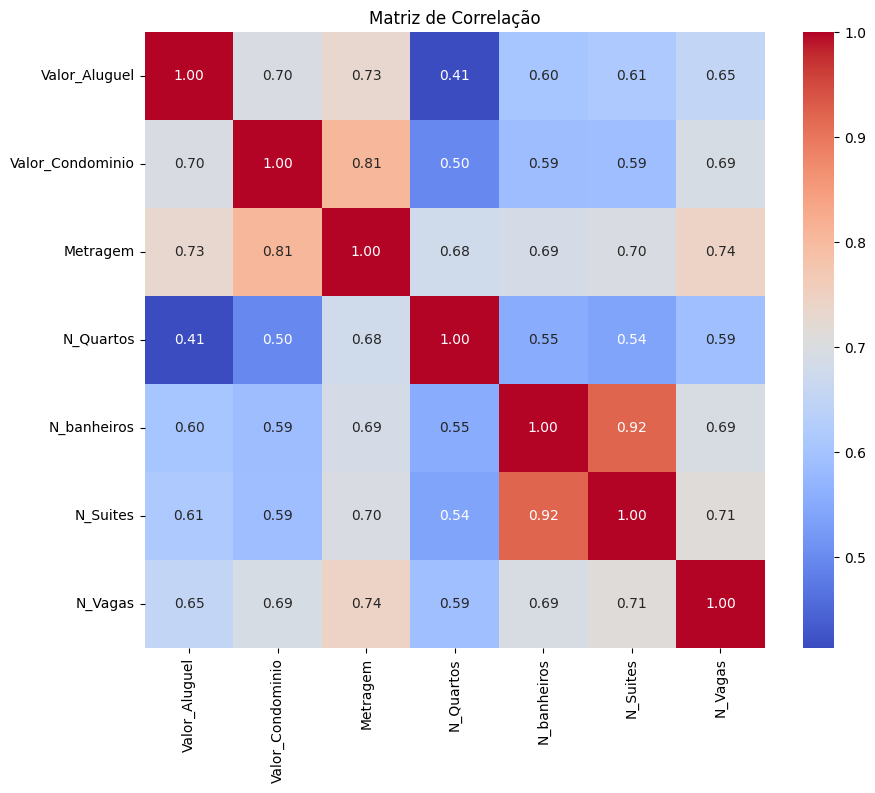

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matrix de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

As variáveis com valores mais fortes com o valor do aluguel são metragem e valor do condomínio. Irei trabalhar com elas adiante.


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [ ]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Tamanho de X_train:', X_train.shape)
print('Tamanho de X_test:', X_test.shape)
print('Tamanho de y_train:', y_train.shape)
print('Tamanho de y_test:', y_test.shape)

Tamanho de X_train: (5402, 6)
Tamanho de X_test: (1801, 6)
Tamanho de y_train: (5402,)
Tamanho de y_test: (1801,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [ ]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

Valor_Aluguel
1500    5.095099
1200    5.025684
2500    4.151048
1300    3.831737
2000    3.831737
          ...   
2695    0.013883
2699    0.013883
2285    0.013883
2290    0.013883
1375    0.013883
Name: proportion, Length: 463, dtype: float64


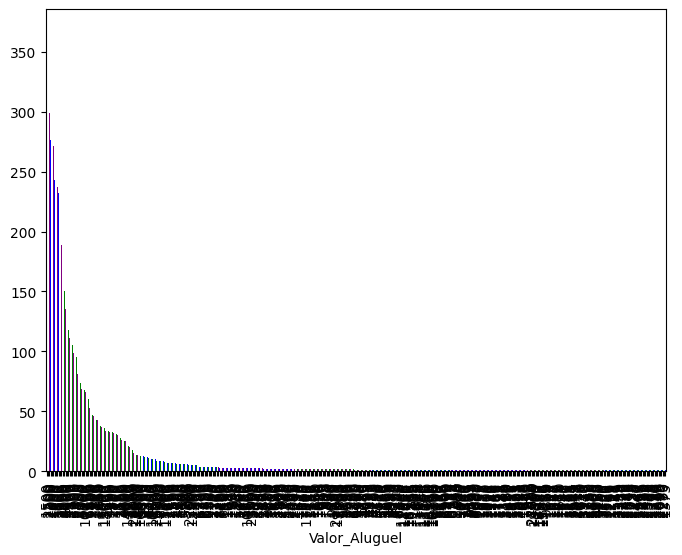

In [ ]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
#Primeiro irei verificar o balanciamento da variável alvo, na base categórica que criamos para realizar a análise bivariada.
va_counts = df['Valor_Aluguel'].value_counts()
plt.figure(figsize=(8,6))
va_counts.plot(kind='bar', color=['blue', 'green', 'purple'])
print((df['Valor_Aluguel'].value_counts(normalize=True) * 100))

In [ ]:
regressao_aluguel = LinearRegression()
regressao_aluguel.fit(X, y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [ ]:
regressao_aluguel.intercept_

np.float64(-103.17820863080306)

In [ ]:
regressao_aluguel.coef_

array([34.70818769])

Nossa equação seria: aluguel= 34.71*(METRAGEM) -103.18.

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [ ]:
regressao_aluguel.score(X,y)

0.5213271756253639

Este valor não parece ser bom, pois está abaixo do esperado. Um R quadrado de 52% não consegui trazer informações suficientes para que a metragem seja uma boa variável que explica o valor do aluguel a ser predito pelo nosso modelo.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

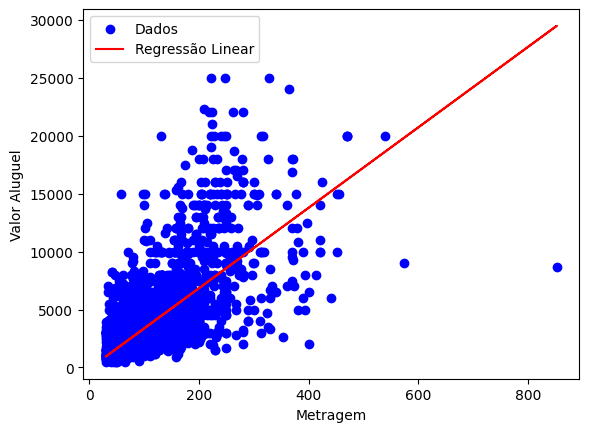

In [ ]:
plt.scatter(X,y, color='blue', label='Dados')
plt.plot(X, regressao_aluguel.predict(X), color='red', label='Regressão Linear')
plt.xlabel('Metragem')
plt.ylabel('Valor Aluguel')
plt.legend()
plt.show()

Percebe-se que há muito registro de dados concentrados no canto inferior esquerdo, enquanto os pontos de valores mais altos estão espalhados pela área do gráfico. Esta configuração de dispersão faz com que o ajuste da reta , e, por conseguência, a capacidade do modelo de nos fornecer que expliquem a predição, não tem o comportamento dos valores mais altos, tanto X quanto y. Por esse motivo, o nosso modelo, para predizer o valor do aluguel apenas utilizando o valor da metragem, não é suficiente para trazer resultados confiáveis.

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [ ]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [ ]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_aluguel.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_aluguel.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5651600449476675


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Os valores encontrados para ambos os R quadrados são próximos, o que indica consistência entre os dados utilizados para treinar o modelo e em sequência testa-los. Contudo, os valor dos R quadrado são significativamente baixos, o que indica que nosso modelo não necessáriamente precise de ajustes para generalizar, mas de fato ele não é suficientemente eficaz na predição que é proposta.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [ ]:
X = df[['Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']]
y = df['Valor_Aluguel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X = X_train[['Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']]
y = y_train


B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [ ]:
regressao_multipla = LinearRegression()
regressao_multipla.fit(X, y)

LinearRegression()

In [ ]:
regressao_multipla.intercept_

np.float64(411.92895077384765)

In [ ]:
regressao_multipla.coef_

array([   0.77302112,   20.72122898, -659.00604215,  240.76046013,
        340.61447028,  522.98401929])

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [ ]:
regressao_multipla.score(X,y)

0.5971610197647366

Podemos observar que a regressão múltipla explica melhor a predição do nosso: considerando variáveis adicionais, além da metragem, o modelo consegui compreender melhor os dados e predizer com mais confiabilidade o valor do aluguel. Contudo, ainda assim, este R quadrado é um valor baixo, o que sugere que nossos dados, de forma geral, não são suficientes para predizer o valor do aluguel com certeza.

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [ ]:
X_test = X_test[['Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']]
y_test = y_test

previsoes_m = regressao_multipla.predict(X_test)
r2_m = regressao_multipla.score(X_test, y_test)

print('Coeficiente de Determinação (R quadrado) nos Dados de Teste:', r2_m)

Coeficiente de Determinação (R quadrado) nos Dados de Teste: 0.6327633459161506


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Como mencionado anteriormente, o R quadrado da regressão múltipla é superior ao da regressão linear simples. Isso se deve ao fato de que só a variável metragem não era suficiente para preditar o valor do aluguel de forma assertiva. Ao acrescentarmos outras variáveis, o modelo compreendeu melhor o comportamento do valor do aluguel em diferentes características e conseguiu predizer com mais confiabilidade os valores do aluguel. Mas é válida a observação de que o R quadrado tão baixo das regressões dificulta que seja apresentado como modelo confiável para predições propostas.